# Many Bhabha events in MCParticlesSkimmed

In [1]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import uproot

from lcio_checks.mc.simulation import add_simulation_info
from lcio_checks.util import config, load_or_make

f = uproot.open(f"{config['data_dir']}/P2f_z_eehiq.root")["MyLCTuple"]
mc = f.arrays(filter_name="mc*", entry_stop=-1)
mc = add_simulation_info(mc)

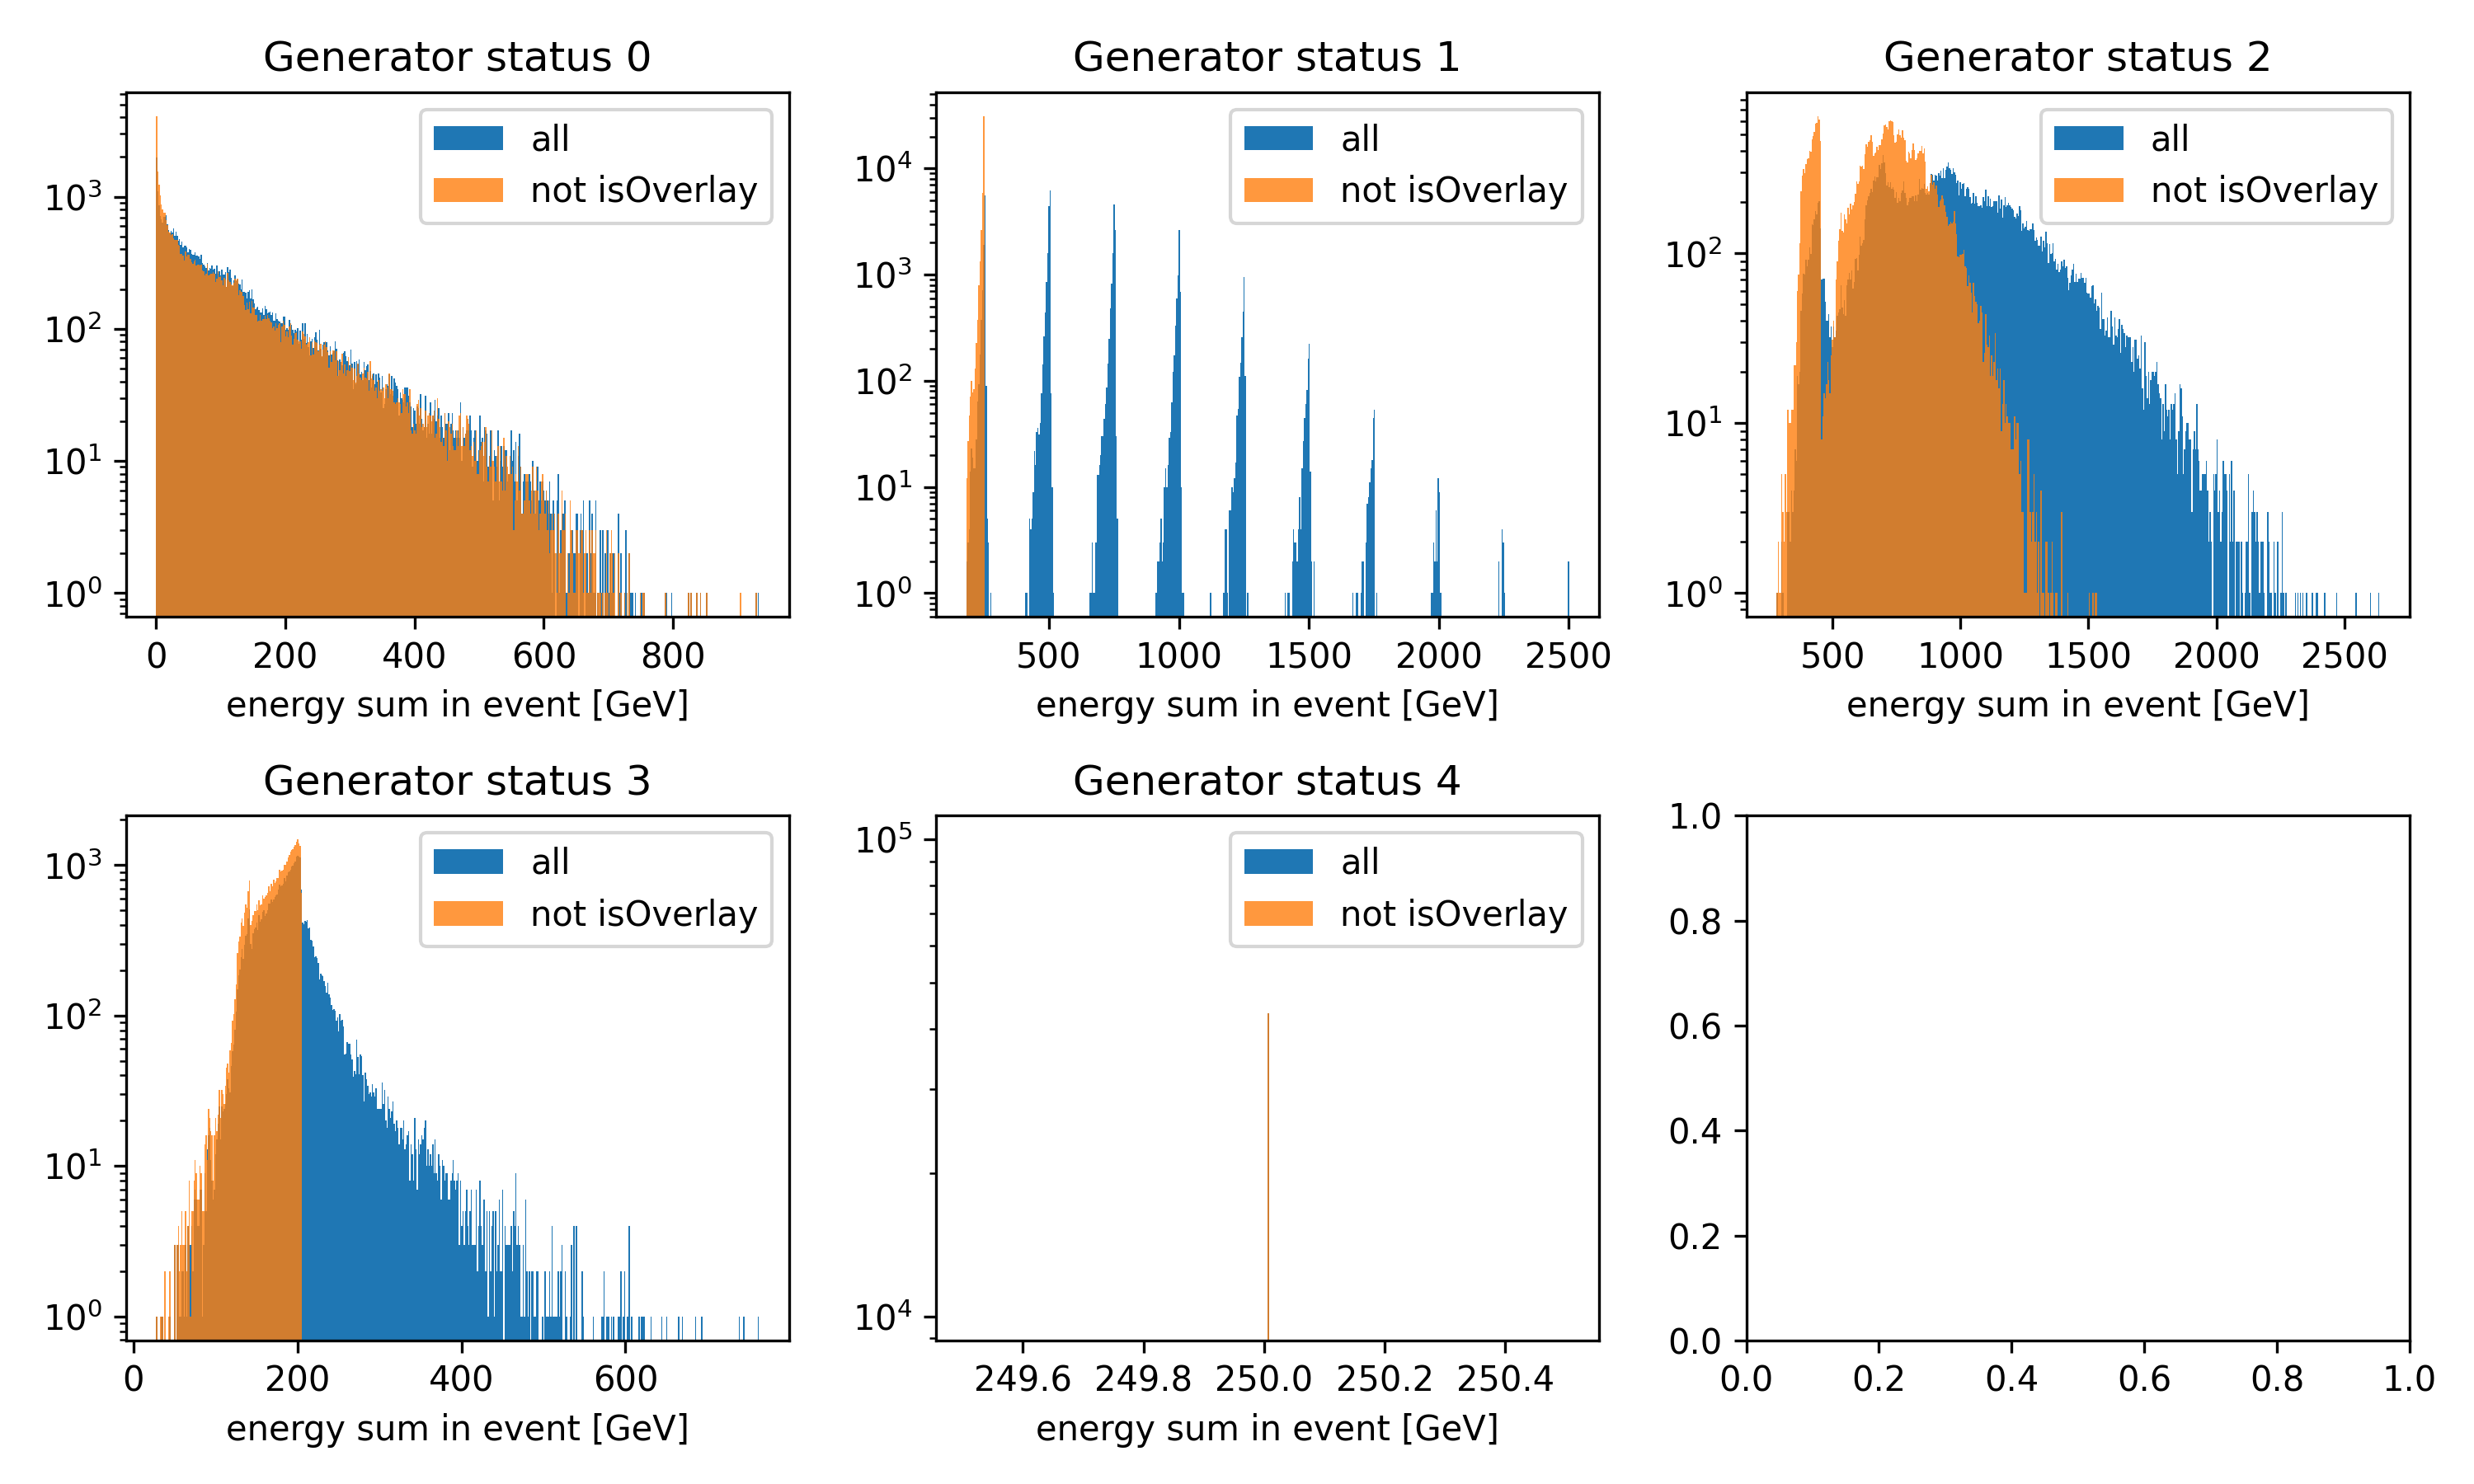

In [2]:
@load_or_make(["energy_sum_per_generator_status"])
def energy_sum_per_generator_status():
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 6))
    for gst, ax in zip(range(5), axs.flatten()):
        bins = ax.hist(
            ak.sum(mc[(mc.mcgst == gst)].mcene, axis=1), bins=500, label="all"
        )[1]
        ax.hist(
            ak.sum(mc[(mc.mcgst == gst) & ~mc.isOverlay].mcene, axis=1),
            bins=bins,
            alpha=0.8,
            label="not isOverlay",
        )
        ax.legend()
        ax.set_title(f"Generator status {gst}")
        ax.set_xlabel("energy sum in event [GeV]")
        ax.set_yscale("log")
    fig.tight_layout()
    return (fig,)


energy_sum_per_generator_status();

## Energy in event after angular selection cut


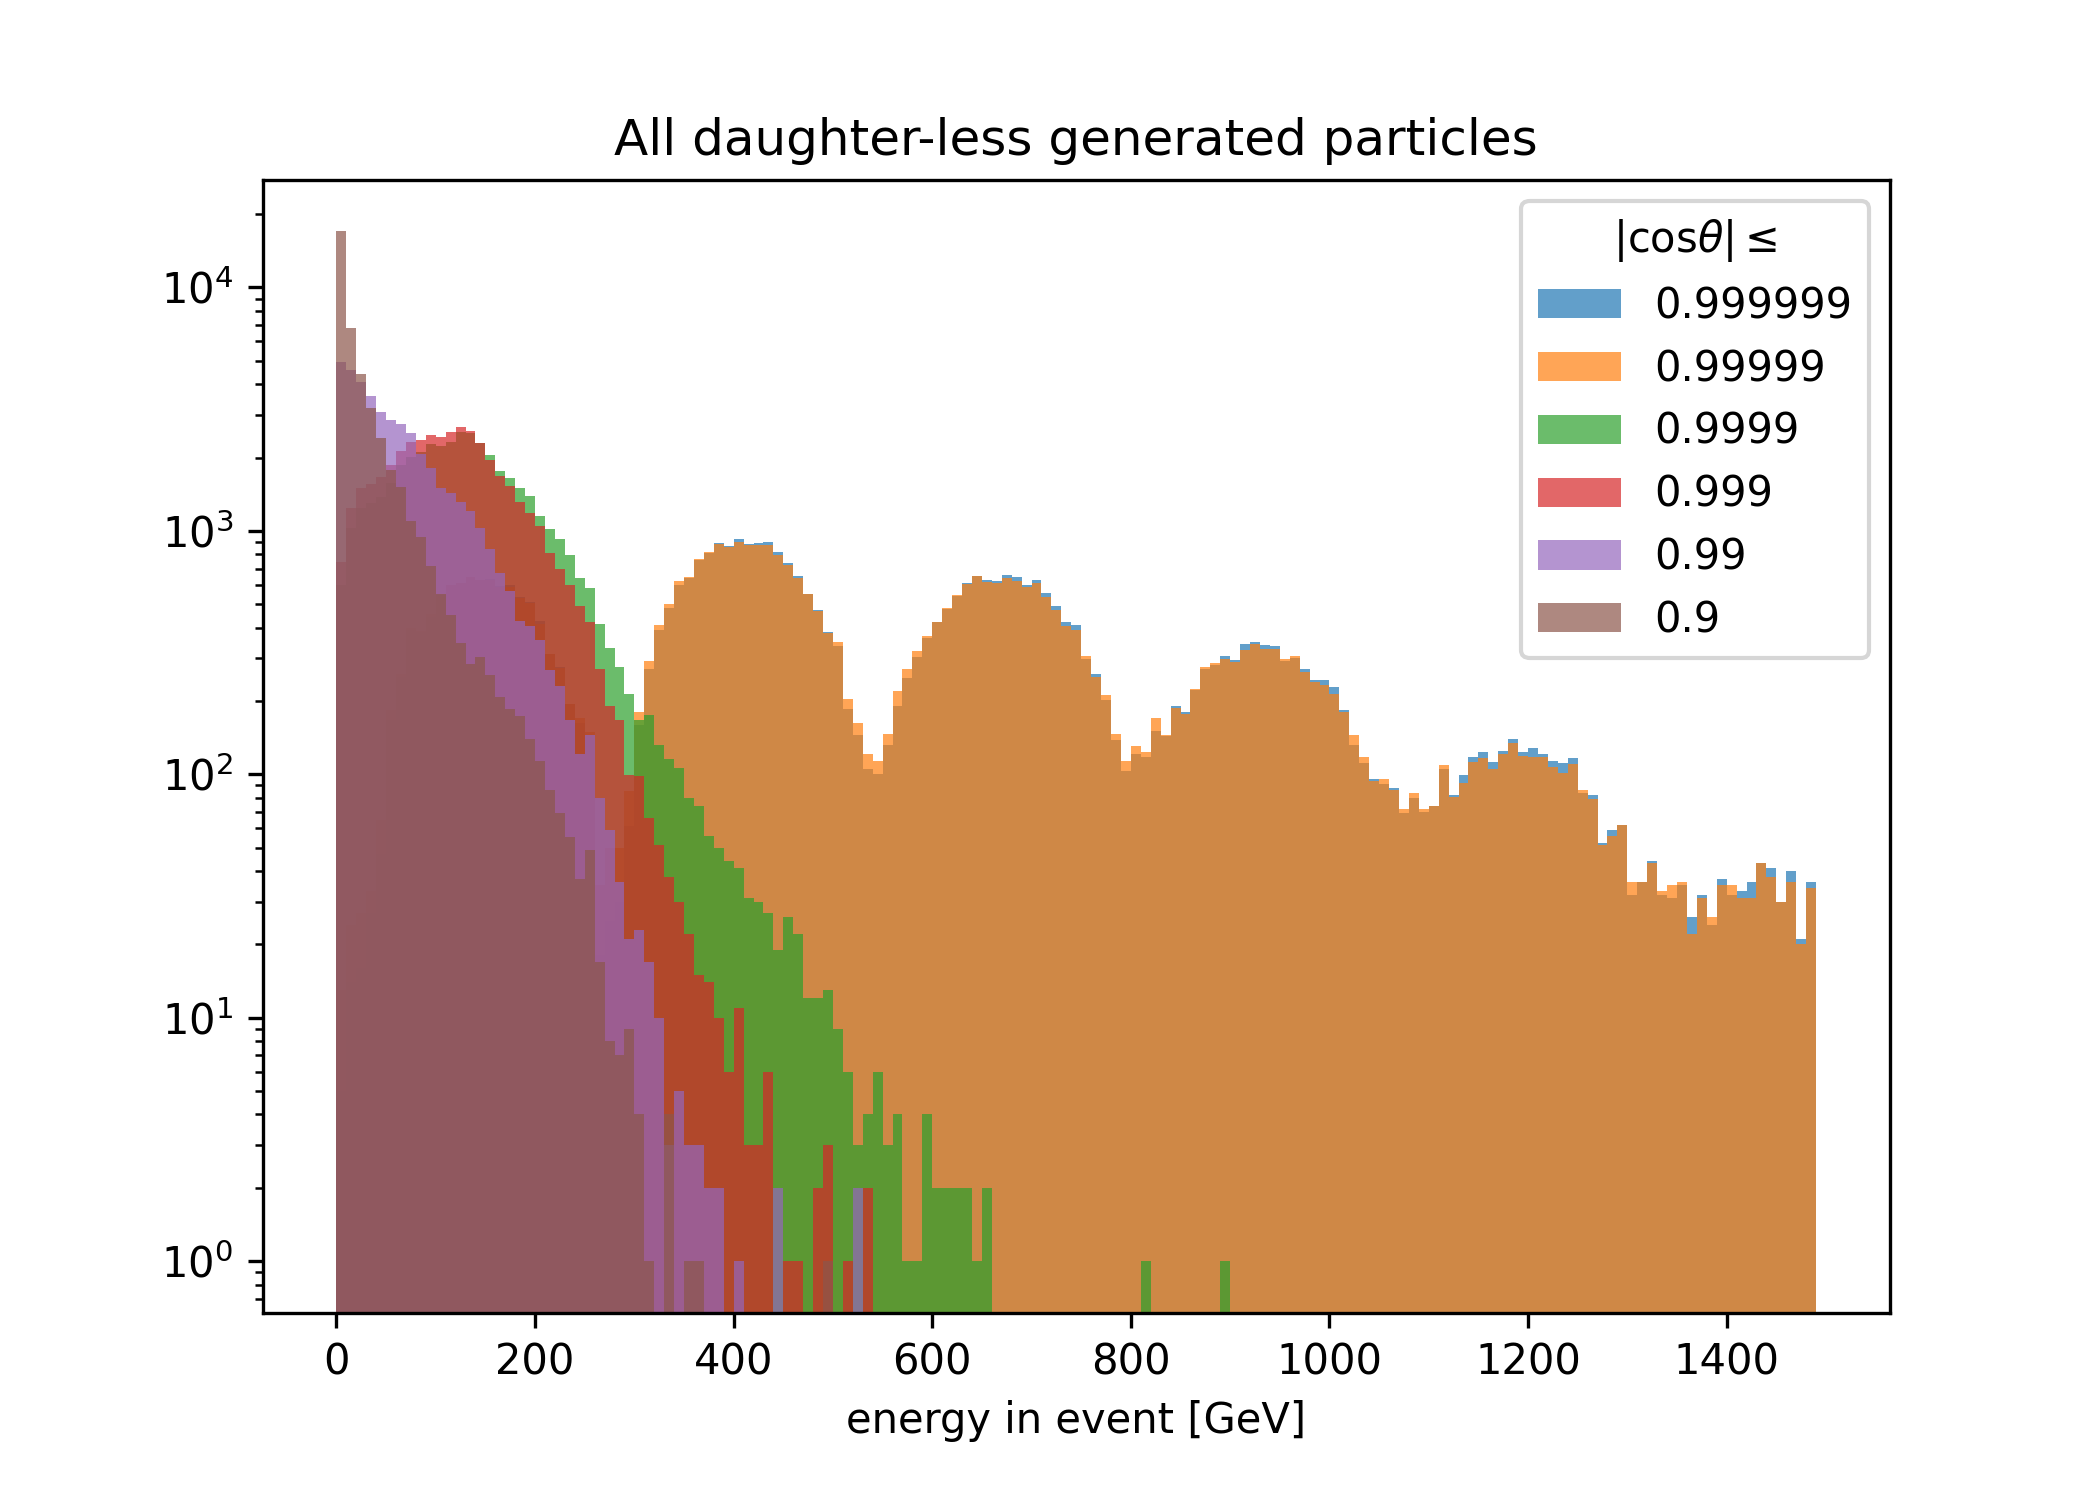

(<Figure size 504x360 with 1 Axes>,)

In [3]:
@load_or_make(["energy_sum_angular_acceptance_daughterless"])
def energy_sum_angular_acceptance_daughterless():
    bins = np.arange(0, 1500, 10)
    mcps = mc[mc.mcda0 == -1]
    mcps = mcps[mcps.mcene > 0]
    fig, ax = plt.subplots(figsize=(7, 5))
    for cos_theta in [0.999999, 0.99999, 0.9999, 0.999, 0.99, 0.9]:
        x = ak.sum(mcps[np.abs(mcps.mcmoz) / mcps.mcene < cos_theta].mcene, axis=1)
        ax.hist(x, bins=bins, label=str(cos_theta), alpha=0.7)
    ax.legend(title="|cos$\\theta$|$\\leq$")
    ax.set_yscale("log")
    ax.set_title("All daughter-less generated particles")
    ax.set_xlabel("energy in event [GeV]")
    return (fig,)


energy_sum_angular_acceptance_daughterless()

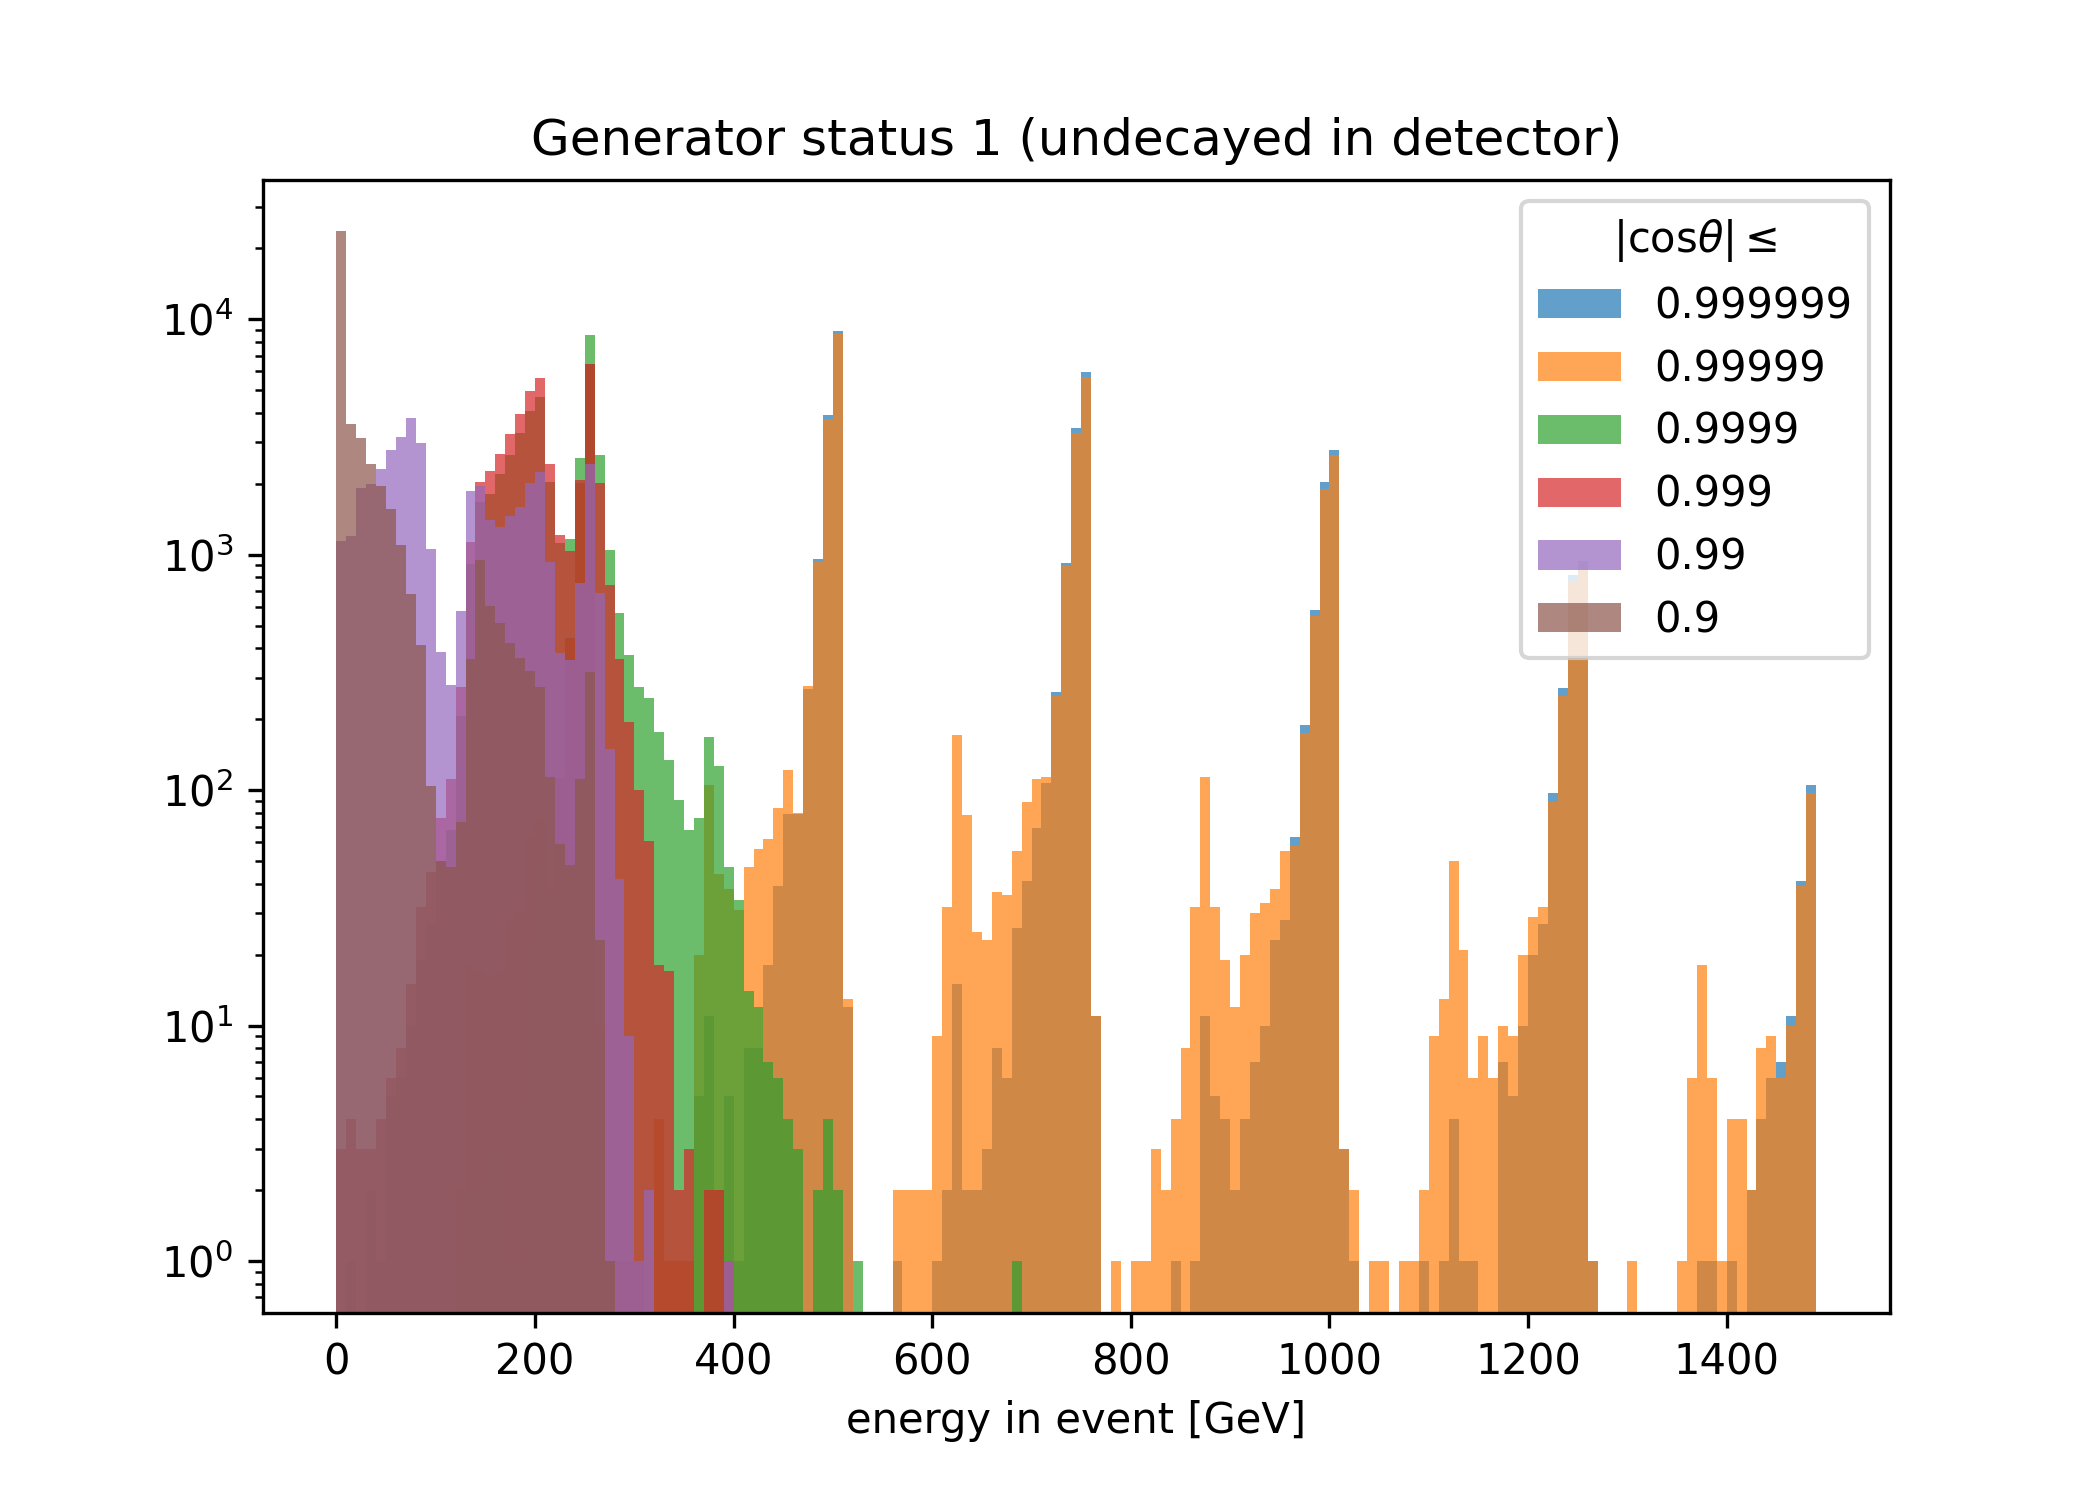

In [4]:
@load_or_make(["energy_sum_angular_acceptance_undecayed_in_detector"])
def energy_sum_angular_acceptance_undecayed_in_detector():
    bins = np.arange(0, 1500, 10)
    mcps = mc[mc.mcgst == 1]
    mcps = mcps[mcps.mcene > 0]
    fig, ax = plt.subplots(figsize=(7, 5))
    for cos_theta in [0.999999, 0.99999, 0.9999, 0.999, 0.99, 0.9]:
        x = ak.sum(mcps[np.abs(mcps.mcmoz) / mcps.mcene < cos_theta].mcene, axis=1)
        ax.hist(x, bins=bins, label=str(cos_theta), alpha=0.7)
    ax.legend(title="|cos$\\theta$|$\\leq$")
    ax.set_yscale("log")
    ax.set_title("Generator status 1 (undecayed in detector)")
    ax.set_xlabel("energy in event [GeV]")
    return (fig,)


energy_sum_angular_acceptance_undecayed_in_detector();

## Generator status 1

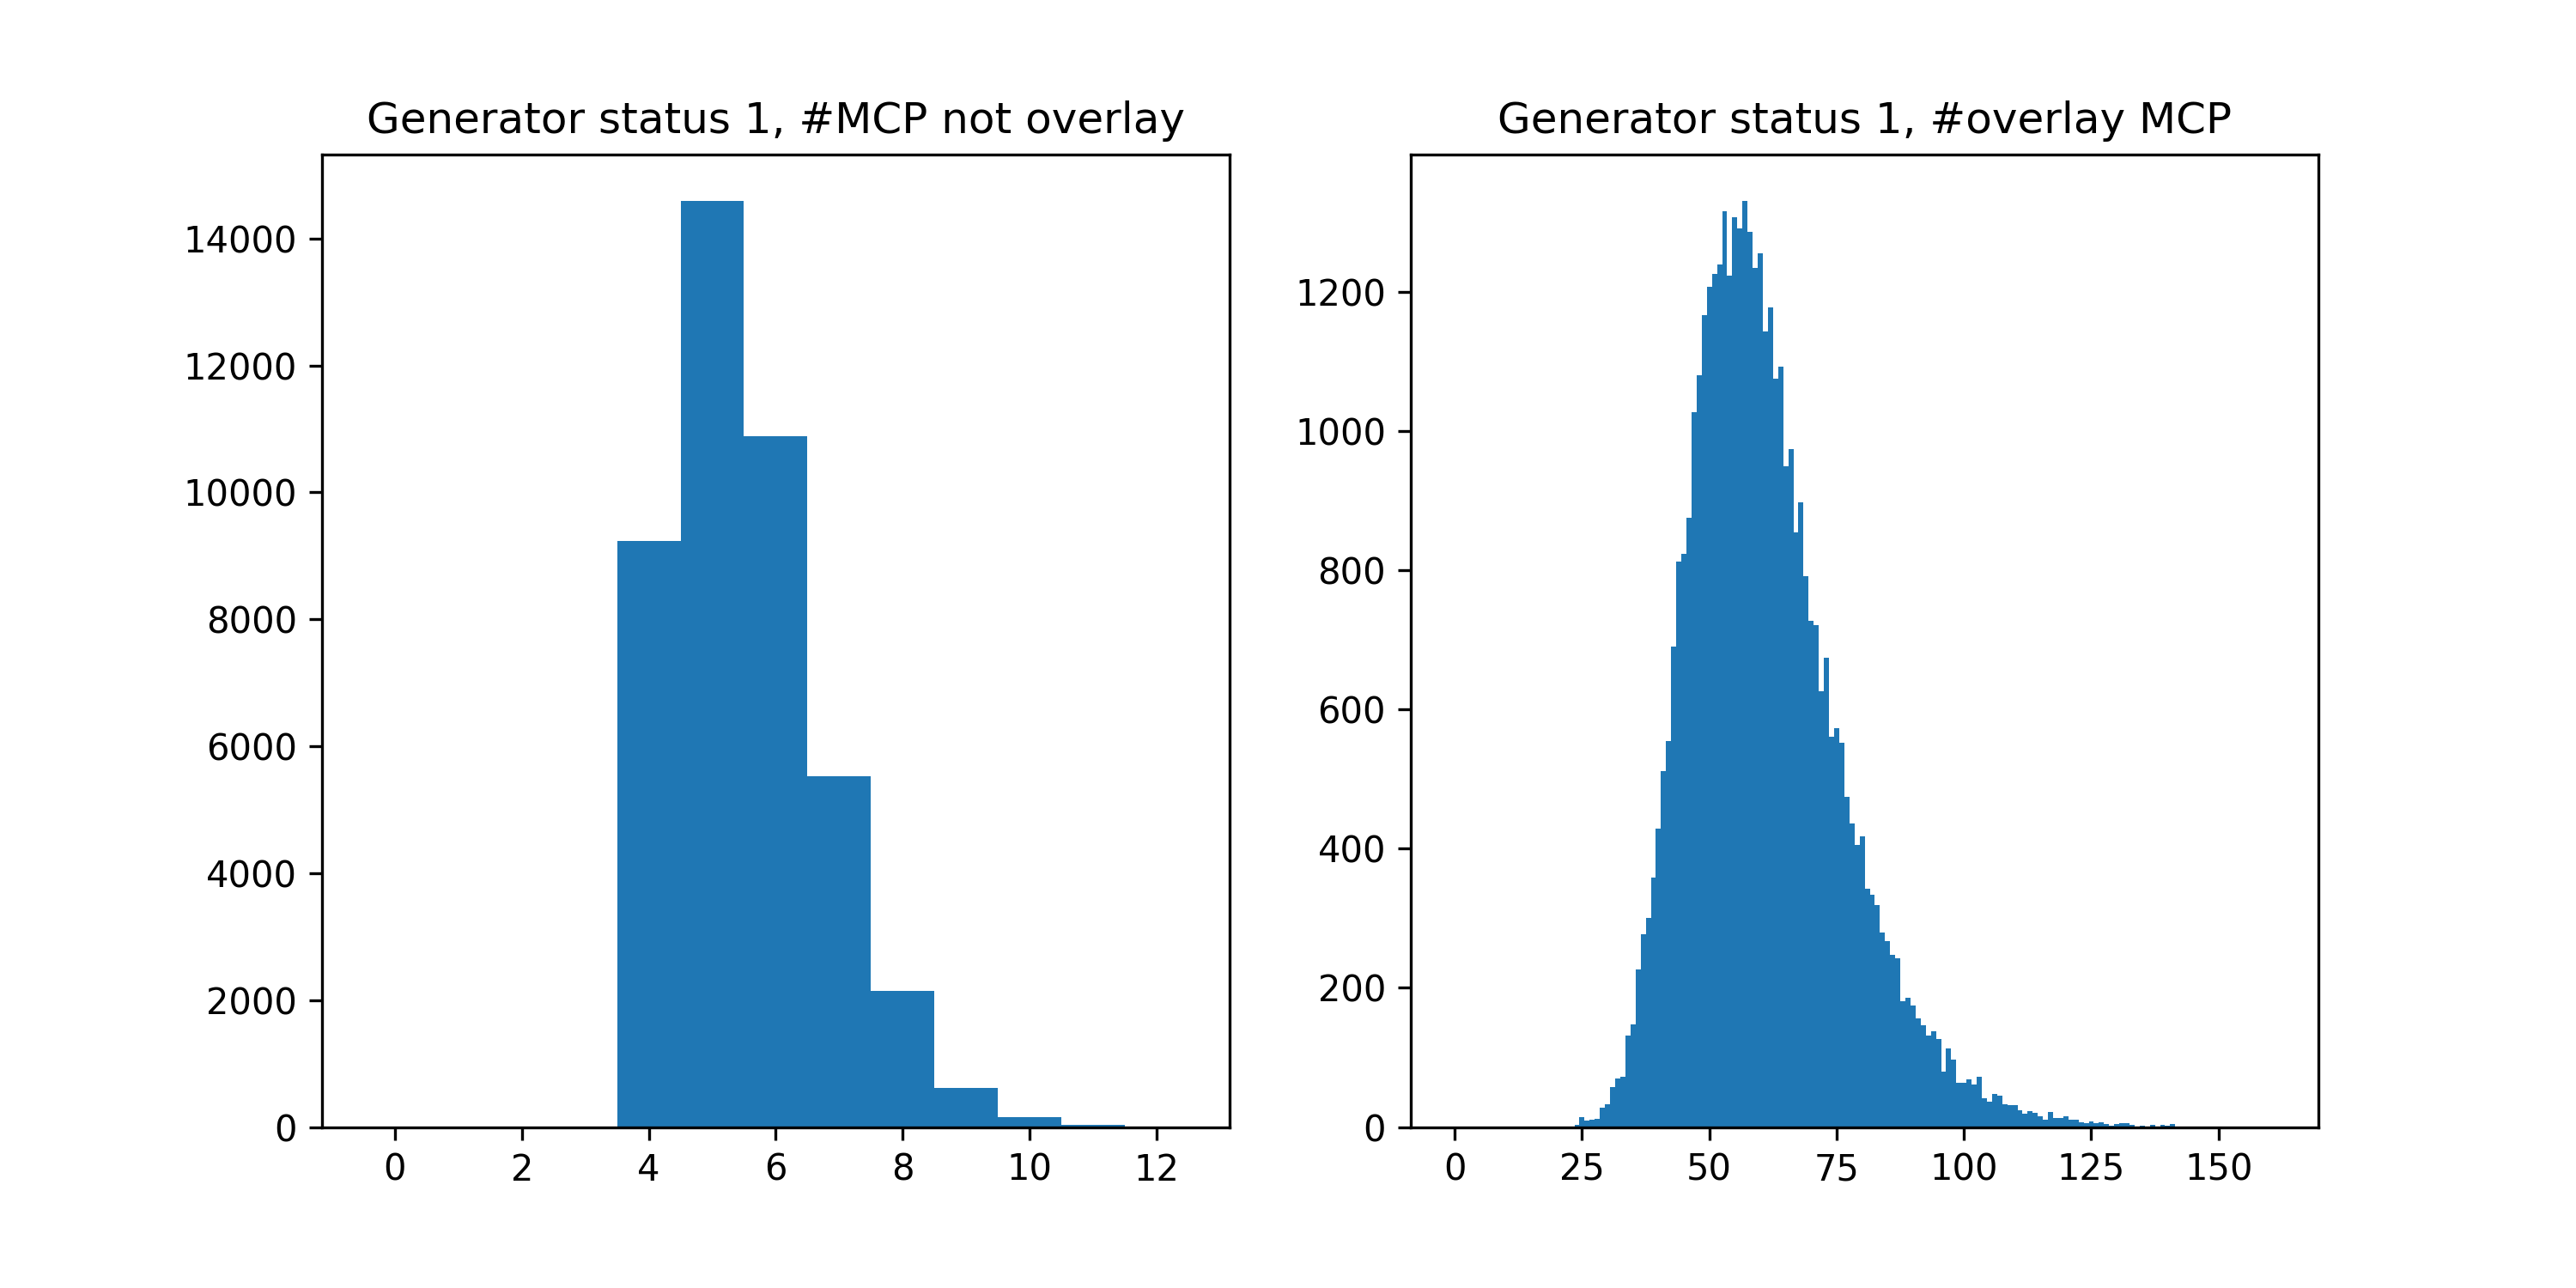

In [5]:
@load_or_make(["overlay_vs_not"])
def overlay_vs_not(mcps):
    fig, axs = plt.subplots(figsize=(10, 5), ncols=2)

    x = ak.num(mcps[~mcps.isOverlay].mcene)
    axs[0].hist(x, bins=np.arange(ak.max(x) + 1) - 0.5)
    axs[0].set_title("Generator status 1, #MCP not overlay")

    x = ak.num(mcps[mcps.isOverlay].mcene)
    axs[1].hist(x, bins=np.arange(ak.max(x) + 1) - 0.5)
    axs[1].set_title("Generator status 1, #overlay MCP")
    return (fig,)


overlay_vs_not(mc[mc.mcgst == 1]);

In [6]:
is_vars = [is_var for is_var in mc.fields if is_var.startswith("is")]
df = ak.to_pandas(mc[mc.mcgst == 1][is_vars])
df.describe()

isCreatedInSimulation isBackscatter isDecayedInTracker  \
count                2873254       2873254            2873254   
unique                     1             1                  2   
top                    False         False               True   
freq                 2873254       2873254            2229944   

       isDecayedInCalorimeter isStopped isOverlay  
count                 2873254   2873254   2873254  
unique                      2         2         2  
top                     False     False      True  
freq                  2379640   2108399   2634607

### Simulation stati of the MCP in one event (generator status 1)

In [7]:
df.loc[0]

isCreatedInSimulation  isBackscatter  isDecayedInTracker  \
subentry                                                             
0                         False          False               False   
1                         False          False               False   
2                         False          False               False   
3                         False          False               False   
4                         False          False               False   
5                         False          False               False   
6                         False          False                True   
7                         False          False                True   
8                         False          False               False   
9                         False          False               False   
10                        False          False               False   
11                        False          False               False   
12                        False          False               False   
13                        False          False               False   
14                        False          False                True   
15                        False          False                True   
16                        False          False                True   
17                        False          False                True   
18                        False          False                True   
19                        False          False                True   
20                        False          False                True   
21                        False          False                True   
22                        False          False                True   
23                        False          False                True   
24                        False          False                True   
25                        False          False                True   
26                        False          False                True   
27                        False          False                True   
28                        False          False                True   
29                        False          False                True   
30                        False          False               False   
31                        False          False                True   
32                        False          False                True   
33                        False          False                True   
34                        False          False                True   
35                        False          False                True   
36                        False          False                True   
37                        False          False                True   
38                        False          False                True   
39                        False          False                True   
40                        False          False                True   
41                        False          False                True   
42                        False          False                True   
43                        False          False                True   
44                        False          False                True   
45                        False          False                True   
46                        False          False                True   
47                        False          False                True   
48                        False          False                True   
49                        False          False                True   

          isDecayedInCalorimeter  isStopped  isOverlay  
subentry                                                
0                           True       True      False  
1                           True       True      False  
2                           True       True      False  
3                           True       True      False  
4                          